# Import library

In [ ]:
!pip install aif360


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Import logistic_regression Machine Classification models
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# Load all necessary packages
import sys
sys.path.insert(1, "../")

import numpy as np
np.random.seed(0)

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

from IPython.display import Markdown, display

In [ ]:
# Import logistic_regression Machine Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,classification_report,mean_squared_error

# Import dataset

In [ ]:
df = pd.read_csv("diabetes1.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Raw data

   Outcome      Ratio
0      500  65.104167
1      268  34.895833
##########################################


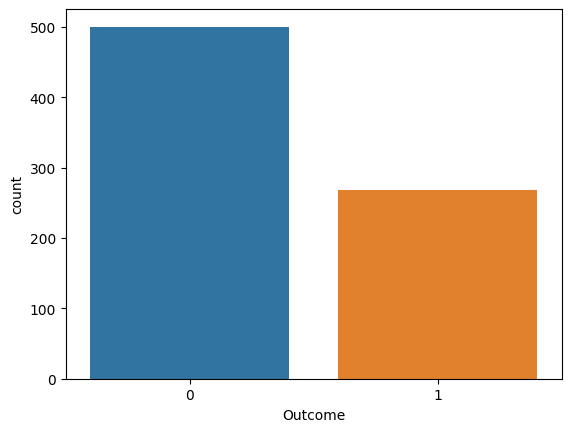

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        #plt.show(block=True)
cat_summary(df, "Outcome", plot=True)

# Data cleaning

In [ ]:
#df.loc[df["Glucose"] != 0 and df["BloodPressure"].item != 0 ]
df2 = df.loc[df["Glucose"] != 0]
df3 = df.loc[df["BloodPressure"] != 0 ]
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               733 non-null    int64  
 1   Glucose                   733 non-null    int64  
 2   BloodPressure             733 non-null    int64  
 3   SkinThickness             733 non-null    int64  
 4   Insulin                   733 non-null    int64  
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  733 non-null    float64
 7   Age                       733 non-null    int64  
 8   Outcome                   733 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.3 KB


Outcome (Target class)

   Outcome      Ratio
0      481  65.620737
1      252  34.379263
##########################################


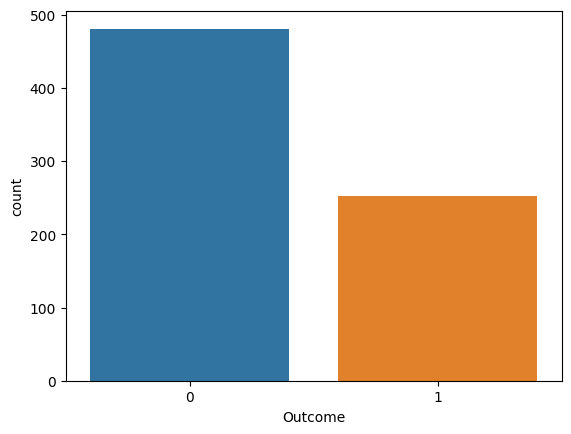

In [ ]:
cat_summary(df3, "Outcome", plot=True)

Heatmap correlation

Text(0.5, 1.0, 'Correlation Between Features')

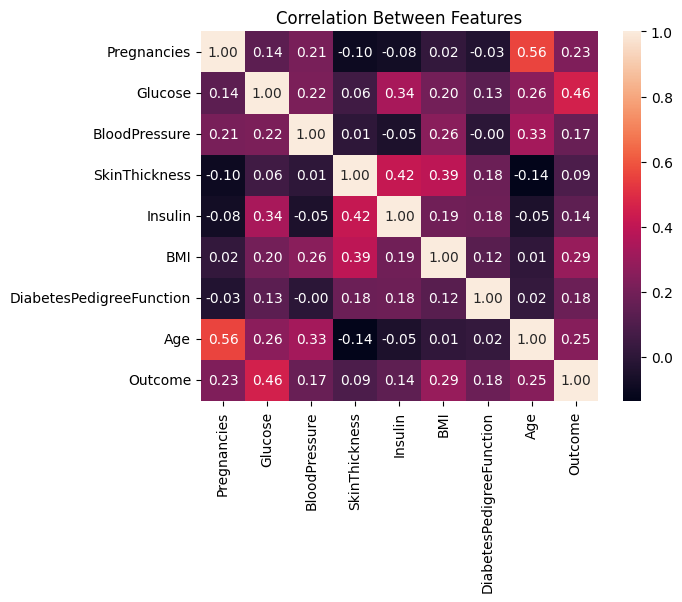

In [ ]:
#Refer : https://www.statology.org/how-to-read-a-correlation-matrix/
corr = df3.corr()

sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns,annot = True, fmt = ".2f")

plt.title("Correlation Between Features")

# Detecting and mitigating glucose bias on diabetes decision

In [ ]:
df4 = df3.copy()
df3['Glucose_category'] = np.where(df3['Glucose'] > 100, 1, 0)

<ipython-input-67-f6ceb0f71c29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Glucose_category'] = np.where(df3['Glucose'] > 100, 1, 0)


In [ ]:
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_category
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,1


# Preparing Non-sampling - NS dataset.

In [ ]:
unprivileged_groups = [{'Glucose_category': 0.0}]
privileged_groups = [{'Glucose_category': 1.0}]

In [ ]:
#X_NS = df5_NS.drop(['Outcome'], axis = 1).values
X_NS = df3.drop(['Outcome'], axis = 1)
X_NS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_category
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1
764,2,122,70,27,0,36.8,0.340,27,1
765,5,121,72,23,112,26.2,0.245,30,1
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
y_NS = df3['Outcome']
y_NS

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 733, dtype: int64

In [ ]:
print(X_NS.shape)
print(y_NS.shape)


(733, 9)
(733,)


# logistic_regression model and Confusion Matrix (Non sampling)

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
count = 1
model = LogisticRegression()

all_y_pred_glu_more_100_NS = []
all_y_test_glu_more_100_NS = []

X_NS_array = X_NS.values
y_NS_array = y_NS.values

for train_index, test_index in kf.split(X_NS_array,y_NS_array):
    X_train, X_test = X_NS_array[train_index], X_NS_array[test_index]
    y_train, y_test = y_NS_array[train_index], y_NS_array[test_index]

    df_metric = pd.DataFrame({'Pregnancies': X_train[:, 0], 'Glucose': X_train[:, 1],
                                                        'BloodPressure': X_train[:, 2], 'SkinThickness': X_train[:, 3],
                                                        'Insulin': X_train[:, 4], 'BMI': X_train[:, 5],
                                                        'DiabetesPedigreeFunction': X_train[:, 6], 'Age': X_train[:, 7],
                                                        'Glucose_category': X_train[:, 8],
                                                        'Outcome': y_train})

    training_data = BinaryLabelDataset(df=df_metric, label_names=['Outcome'],
                             protected_attribute_names=['Glucose_category'])

    # Create a BinaryLabelDataset for the training data
    metric_noReweigh = BinaryLabelDatasetMetric(training_data,
                                  unprivileged_groups=unprivileged_groups,
                                  privileged_groups=privileged_groups)

    print(str(count)+" Mean Difference (Statistical Parity Difference) before do Reweighing.")
    print(str(count)+".1 Before do Reweighing.")
    print(f"Mean Difference: {metric_noReweigh.mean_difference()}")
    print(f"Disparate Impact: {metric_noReweigh.disparate_impact()}")

    reweighing = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    training_data_reweighted = reweighing.fit_transform(training_data)

    # Create a BinaryLabelDataset for the training data after doing Reweighing.
    metric_Reweigh = BinaryLabelDatasetMetric(training_data_reweighted,
                                  unprivileged_groups=unprivileged_groups,
                                  privileged_groups=privileged_groups)

    print(str(count)+".2 After do Reweighing.")
    print(f"Mean Difference: {metric_Reweigh.mean_difference()}")
    print(f"Disparate Impact: {metric_Reweigh.disparate_impact()}")

    print("----------------------------------------------------------------------")
    count+=1

    # Get the reweighted features and labels
    X_train_reweighted = training_data_reweighted.features
    y_train_reweighted = training_data_reweighted.labels.ravel()

    model.fit(X_train_reweighted, y_train_reweighted)
    y_pred = model.predict(X_test)
    all_y_pred_glu_more_100_NS.append(y_pred)
    all_y_test_glu_more_100_NS.append(y_test)



1 Mean Difference (Statistical Parity Difference) before do Reweighing.
1.1 Before do Reweighing.
Mean Difference: -0.35607384113673424
Disparate Impact: 0.18391725058391725
1.2 After do Reweighing.
Mean Difference: 2.220446049250313e-16
Disparate Impact: 1.0000000000000007
----------------------------------------------------------------------
2 Mean Difference (Statistical Parity Difference) before do Reweighing.
2.1 Before do Reweighing.
Mean Difference: -0.3453528399311532
Disparate Impact: 0.20738692474817302
2.2 After do Reweighing.
Mean Difference: -1.6653345369377348e-16
Disparate Impact: 0.9999999999999996
----------------------------------------------------------------------
3 Mean Difference (Statistical Parity Difference) before do Reweighing.
3.1 Before do Reweighing.
Mean Difference: -0.322311605347214
Disparate Impact: 0.2502751788662631
3.2 After do Reweighing.
Mean Difference: -5.551115123125783e-17
Disparate Impact: 0.9999999999999999
----------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

5 Mean Difference (Statistical Parity Difference) before do Reweighing.
5.1 Before do Reweighing.
Mean Difference: -0.3166989948862634
Disparate Impact: 0.26333059885151766
5.2 After do Reweighing.
Mean Difference: -5.551115123125783e-17
Disparate Impact: 0.9999999999999999
----------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
all_y_pred_combine_NS = np.concatenate(all_y_pred_glu_more_100_NS)
all_y_test_combine_NS = np.concatenate(all_y_test_glu_more_100_NS)

In [ ]:
print(classification_report(all_y_test_combine_NS,all_y_pred_combine_NS))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       481
           1       0.65      0.51      0.57       252

    accuracy                           0.74       733
   macro avg       0.71      0.68      0.69       733
weighted avg       0.73      0.74      0.73       733



In [ ]:
conf_matrix_NS = confusion_matrix(all_y_pred_combine_NS,all_y_test_combine_NS)

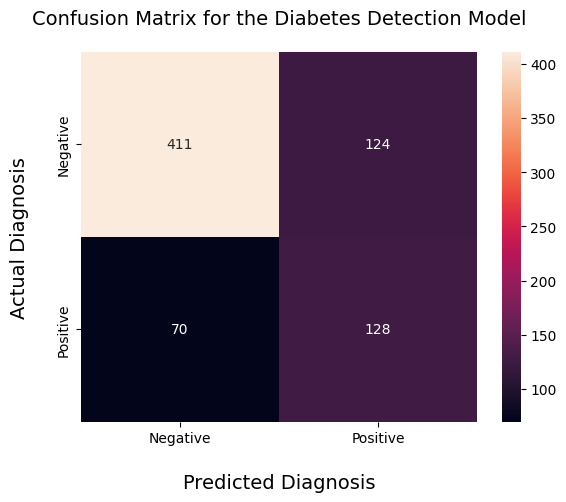

In [ ]:
ax = sns.heatmap(conf_matrix_NS, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)

plt.show()